Regresión isotónica --- 7:20  min
===


* 7:20 min | Ultima modificación: Septiembre 20, 2021 | [YouTube](https://youtu.be/fNV-hH_XJro)

Esta es una técnica para construir modelos de regresión unidimensionales, la cual resuelve el siguiente problema:

$$
\begin{split} 
\text{min  }  & \sum_i w_i \; (y_i - \hat{y}_i)^2 \\
\text{s/to:  } \\
             & \hat{y}_i \le \hat{y}_j \\
             & x_i \le x_j 
\end{split}
$$

![isotonic_regression.png](assets/isotonic_regression.png)

con $w_i$ > 0.

* El modelo produce las predicciones puntuales $\hat{y}_i$ para el conjunto de entrenamiento suministrado.

* El modelo realiza la interpolación para valores de $x$ que no han sido vistos antes.

* Las predicciones del modelo generan una función lineal por tramos.

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html

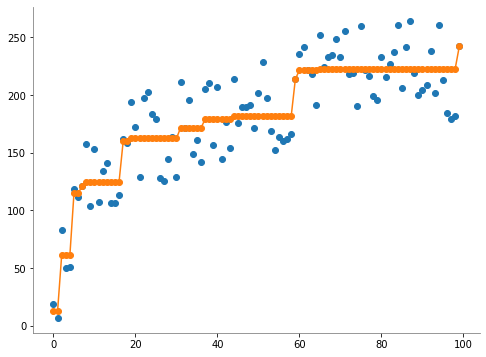

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.isotonic import IsotonicRegression

n_points = 100
x_values = np.arange(n_points)

seed = 12345
rng = np.random.default_rng(seed)
y_values = rng.integers(-50, 50, size=(n_points,)) + 50.0 * np.log1p(
    np.arange(n_points)
)

isotonicRegression = IsotonicRegression(
    # -----------------------------------------------------
    # Indica si las predicciones están restringidas a
    # a crecer o decrecer con x.
    #   - bool
    #   - auto
    #
    increasing=True,
    # -----------------------------------------------------
    # Controla el valor retornado para x por fuera del
    # dominio de entrenamiento.
    #
    #    - 'clip': retorna el valor más cercano del punto
    #              de entrenamiento
    #    - 'nan':  retorna NaN
    #    - 'raise' retorna 'ValueError'.
    #
    out_of_bounds="clip",
)

isotonicRegression.fit(x_values, y_values)

y_pred = isotonicRegression.transform(x_values)

plt.figure(figsize=(8, 6))

plt.plot(
    x_values,
    y_values,
    marker=".",
    color="tab:blue",
    linestyle="",
    markersize=12,
)

plt.plot(
    x_values,
    y_pred,
    marker=".",
    color="tab:orange",
    linestyle="-",
    markersize=12,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()